In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import scipy.stats as st
import ast

In [52]:
# Checking the working directory
import os
print(os.getcwd())

c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025


In [53]:
# Downloading the dataset

import pandas as pd

# Load Pickle version
df = pd.read_pickle(r'c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025\df_clean.pkl')

In [ ]:
# Create a copy of the original DataFrame for analysis purposes

df_copy = df.copy()

In [55]:
# Display summary information on the copy of original DataFrame

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           61953 non-null  int64         
 1   index                61953 non-null  int64         
 2   title                61953 non-null  object        
 3   company_name         61953 non-null  object        
 4   location             61916 non-null  object        
 5   via                  61944 non-null  object        
 6   description          61953 non-null  object        
 7   extensions           61953 non-null  object        
 8   job_id               61953 non-null  object        
 9   thumbnail            38194 non-null  object        
 10  posted_at            61763 non-null  object        
 11  schedule_type        61707 non-null  object        
 12  work_from_home       27980 non-null  object        
 13  salary               10088 non-

In [56]:
# Filter Data Frame to include only data for the year 2024

df_2024 = df_copy[df_copy['year'] == 2024].copy()

In [57]:
# Display summary information of filtered 2024 DataFrame

df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16469 entries, 2846 to 51437
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           16469 non-null  int64         
 1   index                16469 non-null  int64         
 2   title                16469 non-null  object        
 3   company_name         16469 non-null  object        
 4   location             16459 non-null  object        
 5   via                  16469 non-null  object        
 6   description          16469 non-null  object        
 7   extensions           16469 non-null  object        
 8   job_id               16469 non-null  object        
 9   thumbnail            12185 non-null  object        
 10  posted_at            16420 non-null  object        
 11  schedule_type        16414 non-null  object        
 12  work_from_home       8723 non-null   object        
 13  salary               2766 non-nul

In [58]:
# Verifying the descriptive statistics for filtered 2024 DataFrame

df_2024.describe()

,Unnamed: 0,index,date_time,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,year,month
count,16469.000000,16469.000000,16469,0.0,2766.00000,2581.000000,2581.000000,1326.000000,1411.000000,2766.000000,16469.0,16469.000000
mean,15551.623110,1114.941709,2024-05-14 11:00:27.364259584,NaN,54524.75351,44023.252042,67051.102077,36.702560,106698.816701,91958.738599,2024.0,4.946202
min,2846.000000,0.000000,2024-01-01 04:00:13.479853,NaN,9.00000,8.000000,10.000000,9.000000,40000.000000,18720.000000,2024.0,1.000000
25%,8397.000000,528.000000,2024-02-22 04:00:37.991475968,NaN,33.50000,20.000000,50.000000,22.695000,80000.000000,60476.000000,2024.0,2.000000
50%,13554.000000,1076.000000,2024-04-24 03:00:18.250747904,NaN,52990.25000,41705.000000,68088.000000,33.000000,100000.000000,86410.000000,2024.0,4.000000
75%,17671.000000,1674.000000,2024-07-07 03:00:11.007886080,NaN,100000.00000,80000.000000,120000.000000,47.500000,125000.000000,115000.000000,2024.0,7.000000
max,51437.000000,3227.000000,2024-12-31 04:00:09.012533,NaN,550000.00000,450000.000000,850000.000000,258.500000,550000.000000,550000.000000,2024.0,12.000000
std,10448.586592,681.705325,NaN,NaN,60634.93283,47698.628598,75118.064010,20.306962,40591.767997,44090.282453,0.0,3.301617


In [59]:
# Record keeping for filtered data from df_copy Data Frame

print(f'Filtered {len(df_2024):,} job postings for year 2024')

Filtered 16,469 job postings for year 2024


In [60]:
# Check Data Frame df_2024's filtered data validation

assert df_2024['year'].nunique() == 1 and df_2024['year'].iloc[0] == 2024

In [61]:
# Log shape changes between df_copy and df_2024 Data Frames

print(f'Original: {df_copy.shape[0]:,} rows -> 2024 subset: {df_2024.shape[0]:,} rows')

Original: 61,953 rows -> 2024 subset: 16,469 rows


In [62]:
# Select and reorder relevant columns for analysis, and reset index for clarity

df_2024 = df_2024[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

df_2024.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2024-11-18 04:00:07.440530,2024-11-18,2024,11,ACME AtronOmatic,Anywhere,acme atronomatic,Full-Time,True,,Data Scientist,NaN,NaN,NaN,"[sql, r, python]"
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,"[word, bigquery, redshift, excel, tableau, loo..."
2,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Progressive Insurance,United States,taleo,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,[sql]
3,2024-11-18 04:00:07.440530,2024-11-18,2024,11,DISH,"Littleton, CO",dish careers - dish network,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[pandas, redshift, tableau, airflow, r, aws, p..."
4,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Trimble,"Westminster, CO",jobs at trimble,Full-Time,False,Intern,Data Analyst,NaN,NaN,NaN,"[excel, sql, python]"


# Capturing the Most In-Demand Skills For Data Postitions in 2024

In [63]:
# Count job titles in df_2024
# Generate a count of each unique cleaned job title

df_2024['clean_title'].value_counts().reset_index(name='title_total')
df_2024_title_count = df_2024['clean_title'].value_counts().reset_index(name='title_total')
df_2024_title_count.head(5)

,clean_title,title_total
0,Data Analyst,10653
1,Data Scientist,1533
2,Business Analyst,1453
3,Data Engineer,653
4,Healthcare Analyst,334


In [64]:
# Expand the 'job_skills' list into individual rows
# Allows counting each skill independently across job postings

df_2024_skills = df_2024.explode('job_skills')
df_2024_skills[['clean_title', 'job_skills']]

,clean_title,job_skills
0,Data Scientist,sql
0,Data Scientist,r
0,Data Scientist,python
1,Data Analyst,word
1,Data Analyst,bigquery
...,...,...
16467,Data Analyst,python
16468,Data Analyst,qlik
16468,Data Analyst,excel
16468,Data Analyst,power_bi


In [65]:
# Count how often each skill appears for each job title

df_2024_skills_count = (
    df_2024_skills
    .groupby(['job_skills', 'clean_title'])
    .size()
    .reset_index(name='skill_count')
)

df_2024_skills_count

,job_skills,clean_title,skill_count
0,airflow,Business Analyst,7
1,airflow,Data Analyst,98
2,airflow,Data Engineer,61
3,airflow,Data Governance Analyst,1
4,airflow,Data Scientist,18
...,...,...,...
1278,word,Product Analyst,8
1279,word,Risk Analyst,1
1280,word,Statistical Analyst,3
1281,word,Supply Chain Analyst,46


In [66]:
# Merge with total job title counts to calculate percentages

df_2024_skill_percent = pd.merge(
    df_2024_skills_count, 
    df_2024_title_count, 
    how='left', 
    on='clean_title'
)
df_2024_skill_percent

,job_skills,clean_title,skill_count,title_total
0,airflow,Business Analyst,7,1453
1,airflow,Data Analyst,98,10653
2,airflow,Data Engineer,61,653
3,airflow,Data Governance Analyst,1,100
4,airflow,Data Scientist,18,1533
...,...,...,...,...
1278,word,Product Analyst,8,146
1279,word,Risk Analyst,1,43
1280,word,Statistical Analyst,3,73
1281,word,Supply Chain Analyst,46,76


In [67]:
# Calculate percentage of job listings requiring each skill (per title)

df_2024_skill_percent['skill_percentage'] = round(100* df_2024_skill_percent['skill_count'] / 
                                                  df_2024_skill_percent['title_total'], 2)

df_2024_skill_percent

,job_skills,clean_title,skill_count,title_total,skill_percentage
0,airflow,Business Analyst,7,1453,0.48
1,airflow,Data Analyst,98,10653,0.92
2,airflow,Data Engineer,61,653,9.34
3,airflow,Data Governance Analyst,1,100,1.00
4,airflow,Data Scientist,18,1533,1.17
...,...,...,...,...,...
1278,word,Product Analyst,8,146,5.48
1279,word,Risk Analyst,1,43,2.33
1280,word,Statistical Analyst,3,73,4.11
1281,word,Supply Chain Analyst,46,76,60.53


In [68]:
# Renaming columns for clarity

df_2024_skill_percent.rename(columns={
    'job_skills': 'skill',
    'clean_title': 'job_title'
}, inplace=True)

df_2024_skill_percent

,skill,job_title,skill_count,title_total,skill_percentage
0,airflow,Business Analyst,7,1453,0.48
1,airflow,Data Analyst,98,10653,0.92
2,airflow,Data Engineer,61,653,9.34
3,airflow,Data Governance Analyst,1,100,1.00
4,airflow,Data Scientist,18,1533,1.17
...,...,...,...,...,...
1278,word,Product Analyst,8,146,5.48
1279,word,Risk Analyst,1,43,2.33
1280,word,Statistical Analyst,3,73,4.11
1281,word,Supply Chain Analyst,46,76,60.53


In [69]:
# Sorting skills 

df_2024_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_2024_skills_count

,job_skills,clean_title,skill_count
1085,sql,Data Analyst,5489
692,power_bi,Data Analyst,3592
768,python,Data Analyst,3519
246,excel,Data Analyst,3454
1152,tableau,Data Analyst,3131
...,...,...,...
678,postgres,Software Engineer,1
1230,vba,Marketing Analyst,1
1266,word,Data Modeler,1
14,alteryx,Data Architect,1


In [70]:
# Capturing Top 5 job titles in 2024

job_titles_2024 = df_2024_skills_count['clean_title'].dropna().unique().tolist()
job_titles_2024 = sorted(job_titles_2024[:5])
job_titles_2024

['Business Analyst',
 'Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Healthcare Analyst']

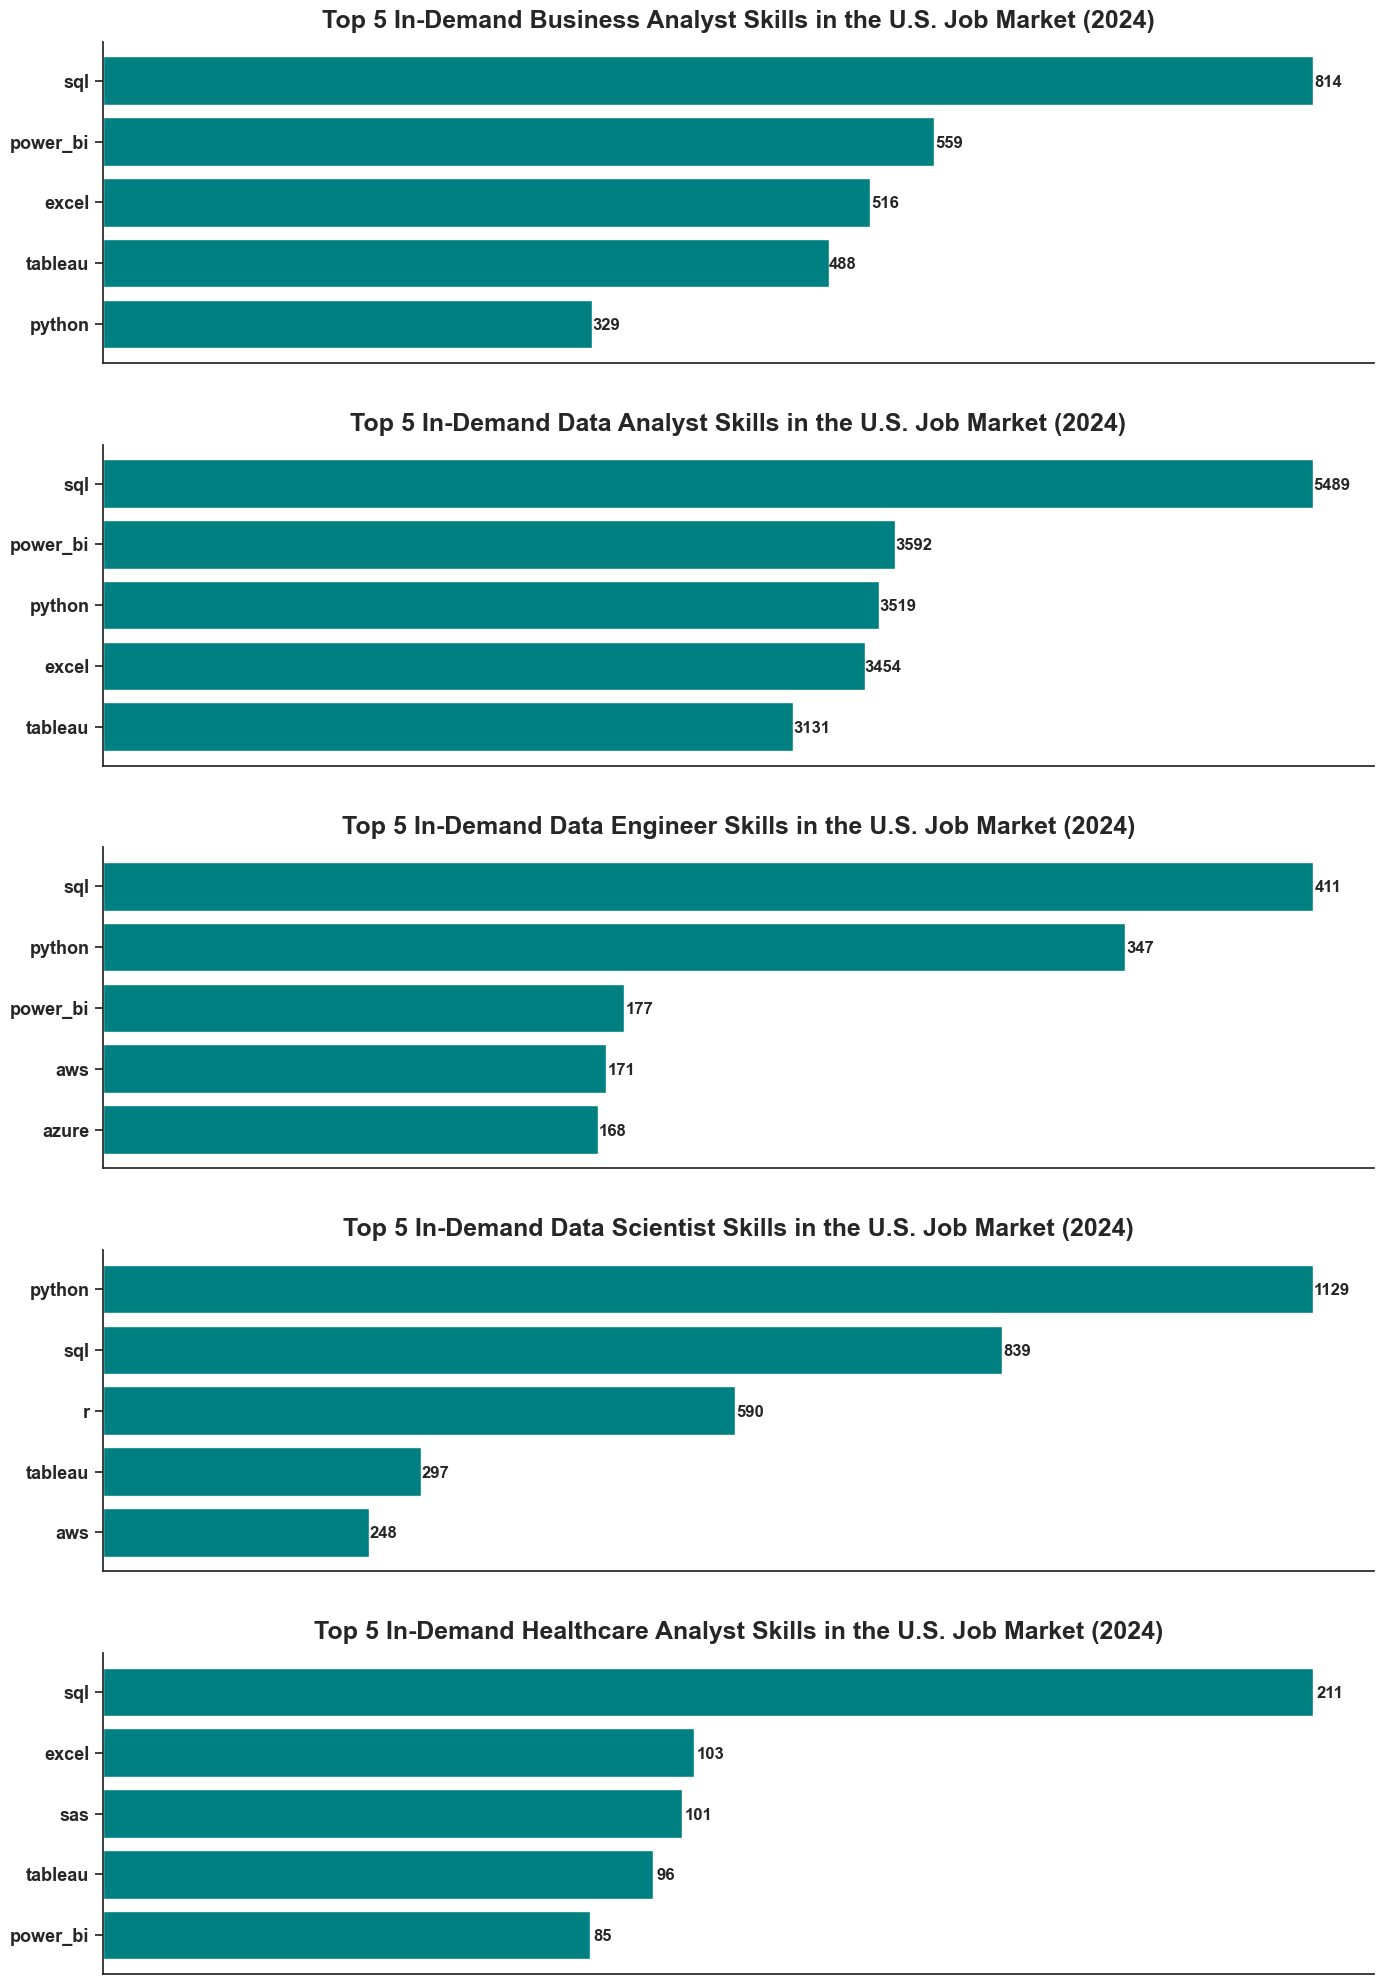

In [ ]:
# Most Sought-After Skills for Leading Data Roles in 2024


# Create subplots
fig, ax = plt.subplots(len(job_titles_2024), 1, figsize=(14, 20), sharex=False)

# Ensure ax is always iterable
if len(job_titles_2024) == 1:
    ax = [ax]

for i, job_title in enumerate(job_titles_2024):
    # Filter and sort top 5 skills
    df_2024_plot = df_2024_skills_count[
        df_2024_skills_count['clean_title'] == job_title
    ].nlargest(5, 'skill_count')

    # Plot with ax[i]
    bars = ax[i].barh(
        df_2024_plot['job_skills'],
        df_2024_plot['skill_count'],
        color='teal'
    )

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax[i].text(
            width + 0.5, y, f'{int(width)}',
            va='center_baseline', 
            fontsize=12, 
            fontweight='bold'
        )

    # Despine the right side
    for axes in ax:
        sns.despine(ax=axes, right=True)

    # Customize each subplot (← moved inside the loop)
    ax[i].invert_yaxis()
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_title(
        f'Top 5 In-Demand {job_title} Skills in the U.S. Job Market (2024)',
        fontsize=18, fontweight='bold', pad=10
    )
     # Make skill names bold and larger
    ax[i].tick_params(axis='y', labelsize=13)
    for label in ax[i].get_yticklabels():
        label.set_fontweight('bold')
    

plt.tight_layout(h_pad=3)
plt.show()


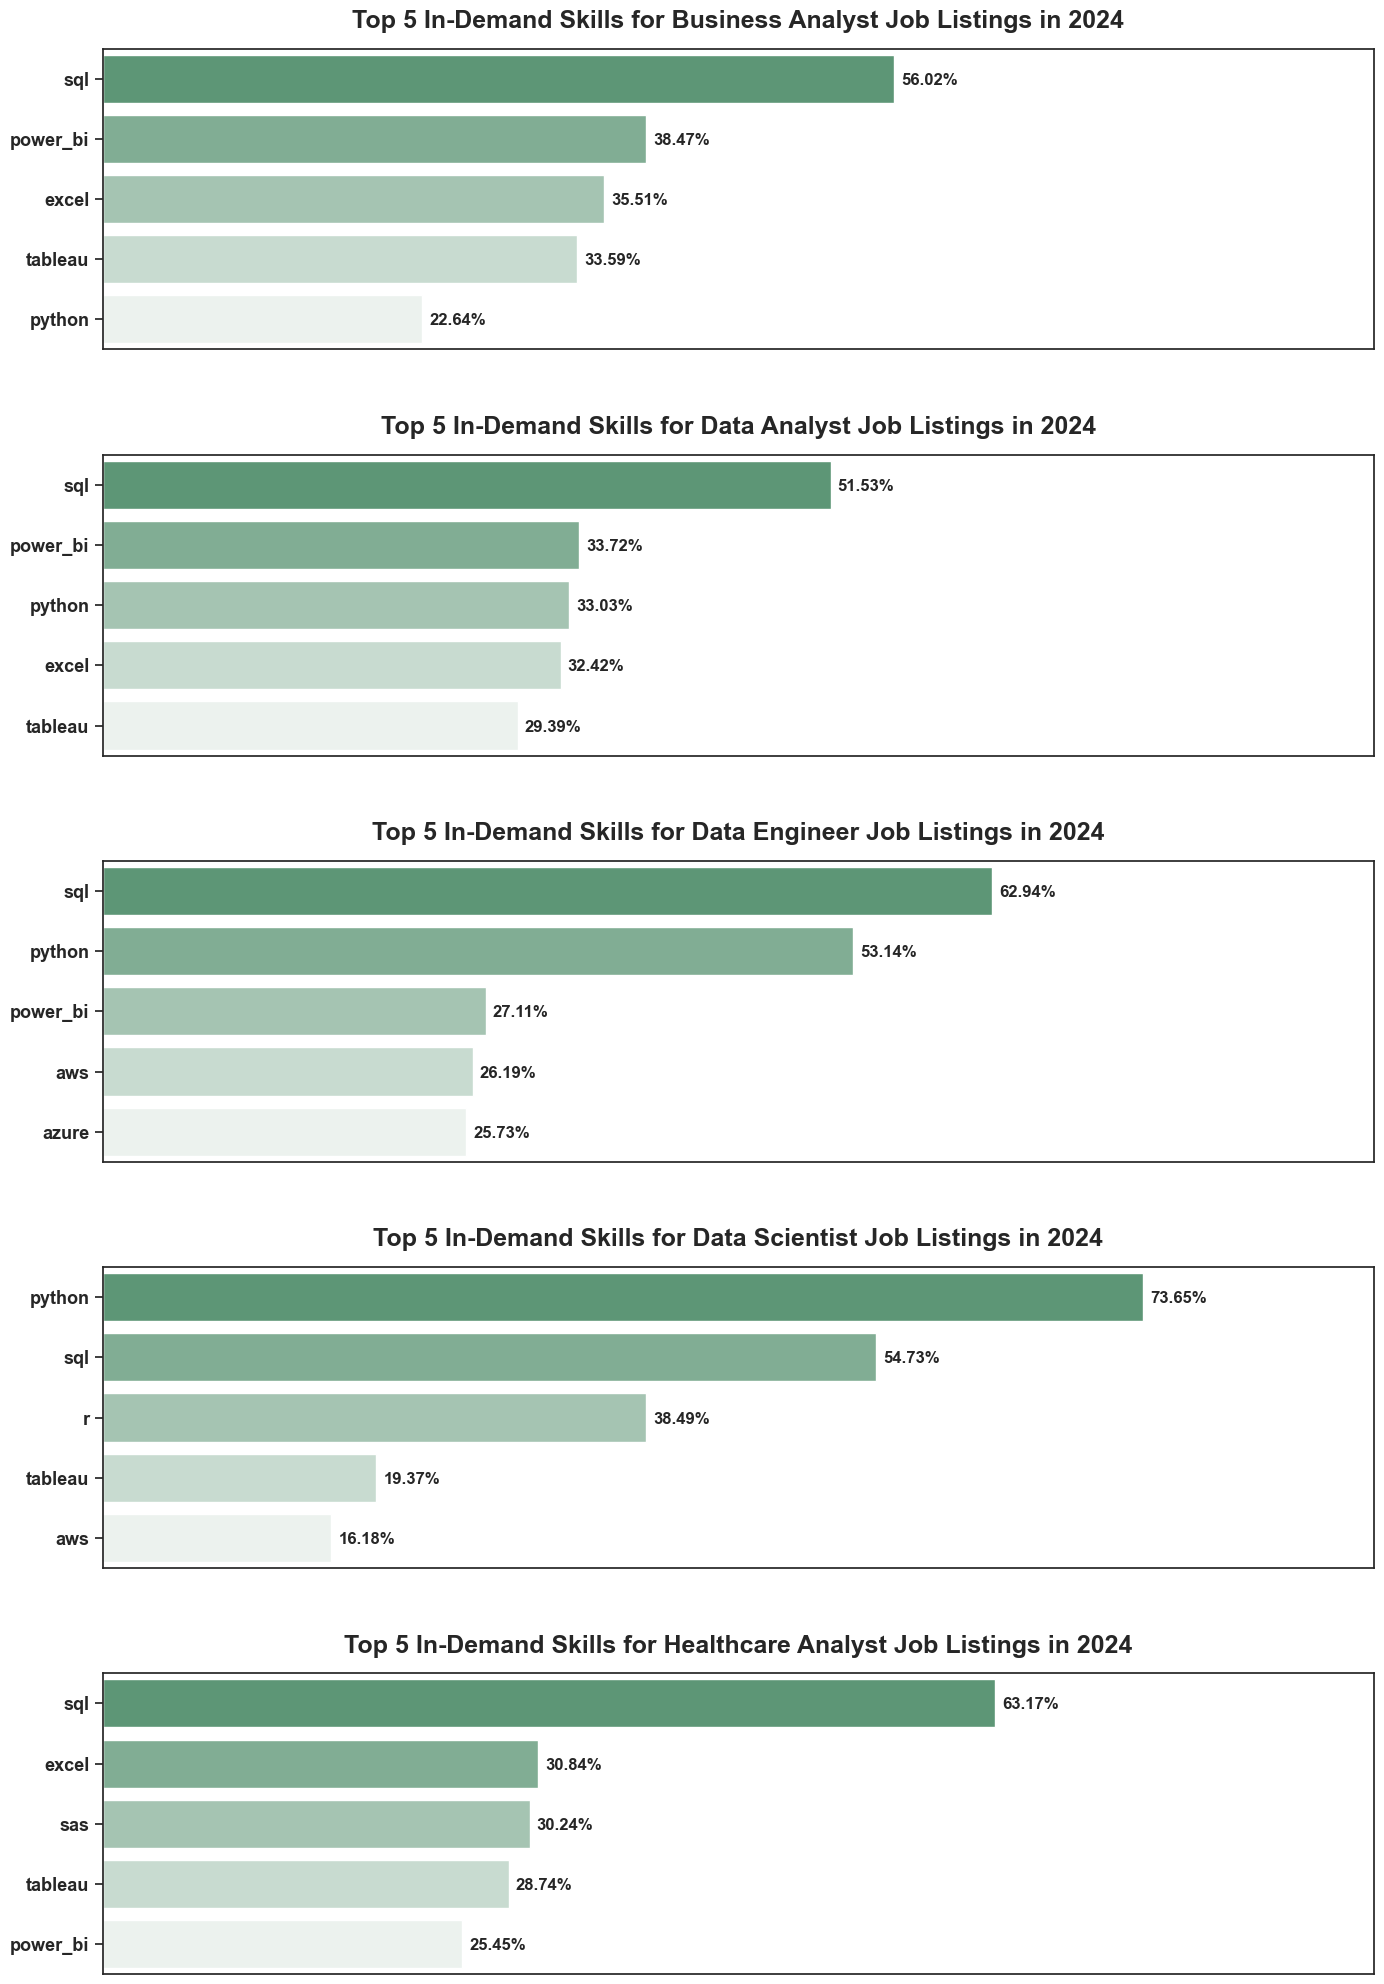

In [179]:
# Key Skills Driving Demand in Data Roles (2024)


# Set the overall theme
sns.set_theme(style='ticks')

# Create subplots
fig, ax = plt.subplots(len(job_titles_2024), 1, figsize=(14, 20), sharex=False)


# Ensuring ax is always iterable
if len(job_titles_2024) == 1:
    ax = [ax]


for i, job_title in enumerate(job_titles_2024):
    # Filter and sort skill counts for the current job title
    df_2024_bar_plot = df_2024_skill_percent[
        df_2024_skill_percent['job_title'] == job_title
    ].nlargest(5, 'skill_count')


    # Add percentage labels to each bar
    for index, value in enumerate (df_2024_bar_plot['skill_percentage']):
        ax[i].text(value + .5, index, f'{value}%', 
                   va='center_baseline', fontsize=12, fontweight='bold')

        

    # Plot horizontal bar chart
    num_lines = df_2024_bar_plot.shape[1]  # number of columns (lines)
    palette = sns.light_palette('seagreen')[:num_lines]

    sns.barplot(
        data=df_2024_bar_plot,
        x='skill_percentage',
        y='skill',
        ax= ax[i],
        hue='skill_count',
        palette=palette

    )
    
    # Title and axis formatting
    ax[i].invert_xaxis()
    ax[i].set_xticks([])
    ax[i].set_title(f'Top 5 In-Demand Skills for {job_title} Job Listings in 2024', 
                    fontsize=18, fontweight='bold', pad=15)
    ax[i].set_xlim(0, 90)
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')

     # Make skill names bold and larger
    ax[i].tick_params(axis='y', labelsize=13)
    for label in ax[i].get_yticklabels():
        label.set_fontweight('semibold')


# Final layout tweaks   
plt.tight_layout(h_pad=4)  # Adding vertical padding between plots
plt.show()

In [23]:
# Explode 'job_skills' list into individual rows
# This allows each skill in a posting to be analyzed separately

df_2024_explode = df_2024.explode('job_skills')
df_2024_explode.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2024-11-18 04:00:07.440530,2024-11-18,2024,11,ACME AtronOmatic,Anywhere,acme atronomatic,Full-Time,True,,Data Scientist,NaN,NaN,NaN,sql
0,2024-11-18 04:00:07.440530,2024-11-18,2024,11,ACME AtronOmatic,Anywhere,acme atronomatic,Full-Time,True,,Data Scientist,NaN,NaN,NaN,r
0,2024-11-18 04:00:07.440530,2024-11-18,2024,11,ACME AtronOmatic,Anywhere,acme atronomatic,Full-Time,True,,Data Scientist,NaN,NaN,NaN,python
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,word
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,bigquery


In [24]:
# Create pivot table of monthly skill counts
# Rows = month, Columns = individual skills, Values = count of mentions

df_2024_pivot = df_2024_explode.pivot_table(
    index='month',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

df_2024_pivot

job_skills,airflow,alteryx,apl,asp.net,assembly,atlassian,aurora,aws,azure,bash,...,ubuntu,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
month,,,,,,,,,,,,,,,,,,,,,
1,23,37,1,1,6,6,4,173,174,11,...,0,16,1,0,34,28,12,1,0,191
2,23,63,0,0,2,6,3,183,196,10,...,0,15,0,1,31,24,6,2,0,154
3,37,46,2,0,3,5,3,166,219,4,...,0,5,6,0,52,21,12,0,0,114
4,15,36,0,1,0,1,5,116,121,9,...,0,7,5,0,38,20,5,0,0,85
5,14,20,0,1,2,3,2,112,163,8,...,7,10,1,0,25,22,1,0,0,90
6,27,49,0,0,4,5,3,133,125,9,...,0,8,1,0,48,20,5,1,0,92
7,26,21,0,0,2,2,2,81,113,1,...,0,4,1,0,14,12,5,0,0,78
9,2,14,0,0,0,0,0,27,25,0,...,0,1,0,1,20,1,1,1,1,40
10,14,25,0,0,1,2,9,61,40,0,...,0,2,1,1,14,10,1,1,0,56


In [25]:
# Add a row labeled 'Total', to calculate total count

df_2024_pivot.loc['Total']  = df_2024_pivot.sum()
df_2024_pivot

job_skills,airflow,alteryx,apl,asp.net,assembly,atlassian,aurora,aws,azure,bash,...,ubuntu,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
month,,,,,,,,,,,,,,,,,,,,,
1,23,37,1,1,6,6,4,173,174,11,...,0,16,1,0,34,28,12,1,0,191
2,23,63,0,0,2,6,3,183,196,10,...,0,15,0,1,31,24,6,2,0,154
3,37,46,2,0,3,5,3,166,219,4,...,0,5,6,0,52,21,12,0,0,114
4,15,36,0,1,0,1,5,116,121,9,...,0,7,5,0,38,20,5,0,0,85
5,14,20,0,1,2,3,2,112,163,8,...,7,10,1,0,25,22,1,0,0,90
6,27,49,0,0,4,5,3,133,125,9,...,0,8,1,0,48,20,5,1,0,92
7,26,21,0,0,2,2,2,81,113,1,...,0,4,1,0,14,12,5,0,0,78
9,2,14,0,0,0,0,0,27,25,0,...,0,1,0,1,20,1,1,1,1,40
10,14,25,0,0,1,2,9,61,40,0,...,0,2,1,1,14,10,1,1,0,56


In [26]:
# Sort column['job_skill'] by total across all months

df_2024_pivot[df_2024_pivot.loc['Total'].sort_values(ascending=False).index]

df_2024_pivot = df_2024_pivot[df_2024_pivot
                              .loc['Total']
                              .sort_values(ascending=False).index]
df_2024_pivot

job_skills,sql,python,power_bi,excel,tableau,r,sas,azure,aws,powerpoint,...,fortran,clojure,datarobot,elixir,mlr,erlang,kotlin,javascript/typescript,sass,vue.js
month,,,,,,,,,,,,,,,,,,,,,
1,1200,764,629,751,595,404,181,174,173,206,...,0,0,1,0,0,0,0,0,0,0
2,1391,869,740,680,657,511,183,196,183,156,...,0,0,0,2,0,1,1,0,0,0
3,1161,803,694,662,663,445,153,219,166,115,...,0,0,0,0,0,0,0,1,0,0
4,921,600,497,555,523,333,119,121,116,88,...,0,0,1,0,1,0,0,0,0,0
5,974,658,557,495,498,401,97,163,112,90,...,1,1,0,0,0,0,0,0,1,0
6,920,617,607,526,501,358,171,125,133,118,...,0,1,0,0,0,0,0,0,0,0
7,724,530,455,403,394,280,105,113,81,78,...,1,0,0,0,0,0,0,0,0,0
9,269,184,296,180,205,137,52,25,27,35,...,0,0,0,0,0,0,0,0,0,1
10,357,243,211,226,182,144,72,40,61,63,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#  Drop 'Total' row after sorting

df_2024_pivot = df_2024_pivot.drop('Total')
df_2024_pivot


job_skills,sql,python,power_bi,excel,tableau,r,sas,azure,aws,powerpoint,...,fortran,clojure,datarobot,elixir,mlr,erlang,kotlin,javascript/typescript,sass,vue.js
month,,,,,,,,,,,,,,,,,,,,,
1,1200,764,629,751,595,404,181,174,173,206,...,0,0,1,0,0,0,0,0,0,0
2,1391,869,740,680,657,511,183,196,183,156,...,0,0,0,2,0,1,1,0,0,0
3,1161,803,694,662,663,445,153,219,166,115,...,0,0,0,0,0,0,0,1,0,0
4,921,600,497,555,523,333,119,121,116,88,...,0,0,1,0,1,0,0,0,0,0
5,974,658,557,495,498,401,97,163,112,90,...,1,1,0,0,0,0,0,0,1,0
6,920,617,607,526,501,358,171,125,133,118,...,0,1,0,0,0,0,0,0,0,0
7,724,530,455,403,394,280,105,113,81,78,...,1,0,0,0,0,0,0,0,0,0
9,269,184,296,180,205,137,52,25,27,35,...,0,0,0,0,0,0,0,0,0,1
10,357,243,211,226,182,144,72,40,61,63,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Count total job listings per month

data_2024_total = df_2024.groupby('month').size()
data_2024_total

month
1     2298
2     2534
3     2106
4     1694
5     1737
6     1618
7     1470
9      449
10     926
11     629
12    1008
dtype: int64

In [29]:
# Calculate percentage of the job listings mentioning each skill per month
# Normalize skill frequency by overall job listing volume

df_2024_percent = round(df_2024_pivot.div(other=data_2024_total/100, axis=0), 2)
df_2024_percent

job_skills,sql,python,power_bi,excel,tableau,r,sas,azure,aws,powerpoint,...,fortran,clojure,datarobot,elixir,mlr,erlang,kotlin,javascript/typescript,sass,vue.js
month,,,,,,,,,,,,,,,,,,,,,
1,52.22,33.25,27.37,32.68,25.89,17.58,7.88,7.57,7.53,8.96,...,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,54.89,34.29,29.20,26.84,25.93,20.17,7.22,7.73,7.22,6.16,...,0.00,0.00,0.00,0.08,0.00,0.04,0.04,0.00,0.00,0.00
3,55.13,38.13,32.95,31.43,31.48,21.13,7.26,10.40,7.88,5.46,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00
4,54.37,35.42,29.34,32.76,30.87,19.66,7.02,7.14,6.85,5.19,...,0.00,0.00,0.06,0.00,0.06,0.00,0.00,0.00,0.00,0.00
5,56.07,37.88,32.07,28.50,28.67,23.09,5.58,9.38,6.45,5.18,...,0.06,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00
6,56.86,38.13,37.52,32.51,30.96,22.13,10.57,7.73,8.22,7.29,...,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,49.25,36.05,30.95,27.41,26.80,19.05,7.14,7.69,5.51,5.31,...,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,59.91,40.98,65.92,40.09,45.66,30.51,11.58,5.57,6.01,7.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22
10,38.55,26.24,22.79,24.41,19.65,15.55,7.78,4.32,6.59,6.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
# Resetting the df_2023_percent index

df_2024_percent = df_2024_percent.reset_index()

In [31]:
#Convert numeric month index to month names

df_2024_percent['month_name'] = df_2024_percent['month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

In [32]:
# Set 'month_name' as index 

df_2024_percent = df_2024_percent.set_index('month_name')

# Drop original numeric month column

df_2024_percent = df_2024_percent.drop(columns='month')

In [33]:
# Verifying the month data has been changed

df_2024_percent

job_skills,sql,python,power_bi,excel,tableau,r,sas,azure,aws,powerpoint,...,fortran,clojure,datarobot,elixir,mlr,erlang,kotlin,javascript/typescript,sass,vue.js
month_name,,,,,,,,,,,,,,,,,,,,,
Jan,52.22,33.25,27.37,32.68,25.89,17.58,7.88,7.57,7.53,8.96,...,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Feb,54.89,34.29,29.20,26.84,25.93,20.17,7.22,7.73,7.22,6.16,...,0.00,0.00,0.00,0.08,0.00,0.04,0.04,0.00,0.00,0.00
Mar,55.13,38.13,32.95,31.43,31.48,21.13,7.26,10.40,7.88,5.46,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00
Apr,54.37,35.42,29.34,32.76,30.87,19.66,7.02,7.14,6.85,5.19,...,0.00,0.00,0.06,0.00,0.06,0.00,0.00,0.00,0.00,0.00
May,56.07,37.88,32.07,28.50,28.67,23.09,5.58,9.38,6.45,5.18,...,0.06,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00
Jun,56.86,38.13,37.52,32.51,30.96,22.13,10.57,7.73,8.22,7.29,...,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Jul,49.25,36.05,30.95,27.41,26.80,19.05,7.14,7.69,5.51,5.31,...,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sep,59.91,40.98,65.92,40.09,45.66,30.51,11.58,5.57,6.01,7.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22
Oct,38.55,26.24,22.79,24.41,19.65,15.55,7.78,4.32,6.59,6.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


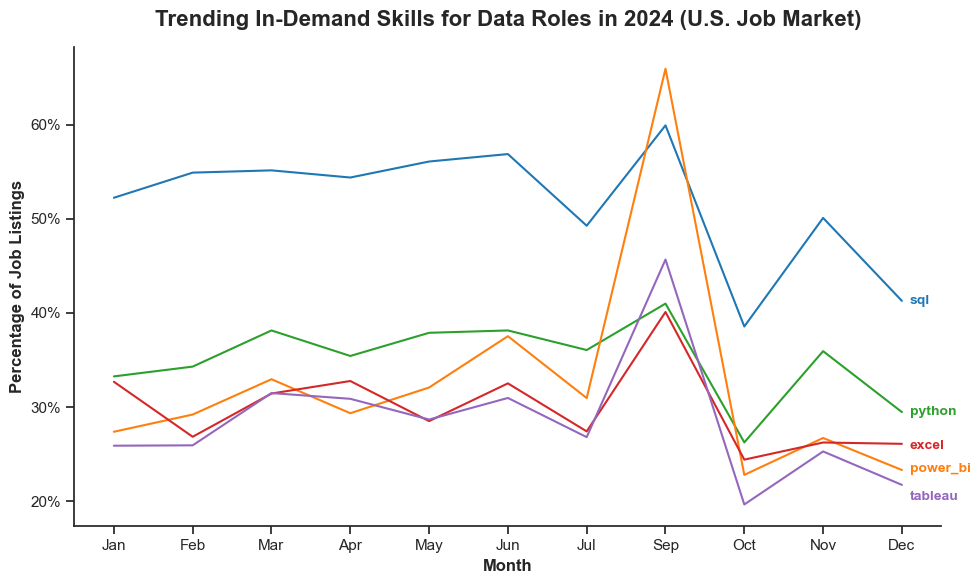

In [34]:
# In-Demand Skills Trends for Data Roles in 2024


# Import libraries
from matplotlib.ticker import PercentFormatter

# Prepare data (top 5 columns for plotting)
df_2024_line_plot = df_2024_percent.iloc[:, :5]

# Define custom color palette (colorblind-friendly)
palette = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd']

# Set theme and removing extra chart border
sns.set_theme(style='ticks')


# Create line plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_2024_line_plot, dashes=False, palette=palette)

# Despine AFTER plotting
sns.despine(ax=ax, right=True, top=True)

# Title 
plt.title('Trending In-Demand Skills for Data Roles in 2024 (U.S. Job Market)', 
          fontsize=16, fontweight='bold', pad=15)

# Adjust label offsets to avoid overlap
offsets = [0, 0, 0.1, -0.2, -1.3]  # Adjust Y positions for each skill

# Axis labels
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Percentage of Job Listings', fontsize=12, fontweight='bold')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend().remove()


# Annotating end of each line with the skill name
for i, column in enumerate(df_2024_line_plot.columns):
    y = df_2024_line_plot.iloc[-1, i] + offsets[i]
    plt.text(len(df_2024_line_plot) - 1 + 0.1, y, column,
             va='center', fontsize=10, fontweight='bold', color=palette[i])
    

# Layout adjustment

plt.tight_layout()
plt.show()

# 2024 US Job Listing Salary Analysis

In [104]:
# Extract top 5 job titles for 2024

df_2024['clean_title'].value_counts().index[:5].to_list()

['Data Analyst',
 'Data Scientist',
 'Business Analyst',
 'Data Engineer',
 'Healthcare Analyst']

In [105]:
# Place top 5 data titles in list named  data_positions_2024

data_positions_2024 = df_2024['clean_title'].value_counts().index[:5].to_list()
data_positions_2024

['Data Analyst',
 'Data Scientist',
 'Business Analyst',
 'Data Engineer',
 'Healthcare Analyst']

In [133]:
# Filter DataFrame for rows where data title is in the top data_positions_2024 list

df_2024_top_positions = df_2024[df_2024['clean_title'].isin(data_positions_2024)]
df_2024_top_positions.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2024-11-18 04:00:07.440530,2024-11-18,2024,11,ACME AtronOmatic,Anywhere,acme atronomatic,Full-Time,True,,Data Scientist,NaN,NaN,NaN,"[sql, r, python]"
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,"[word, bigquery, redshift, excel, tableau, loo..."
2,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Progressive Insurance,United States,taleo,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,[sql]
3,2024-11-18 04:00:07.440530,2024-11-18,2024,11,DISH,"Littleton, CO",dish careers - dish network,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[pandas, redshift, tableau, airflow, r, aws, p..."
4,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Trimble,"Westminster, CO",jobs at trimble,Full-Time,False,Intern,Data Analyst,NaN,NaN,NaN,"[excel, sql, python]"


In [108]:
# Group the DataFrame by clean title, calculate median salary yearly for each,
# Sorts the titles by median salary in descending order, and returns the sorted clean titles.

position_order_2024 = df_2024_top_positions.groupby('clean_title')['salary_yearly'].median().sort_values(ascending=False).index
position_order_2024

Index(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Business Analyst',
       'Healthcare Analyst'],
      dtype='object', name='clean_title')

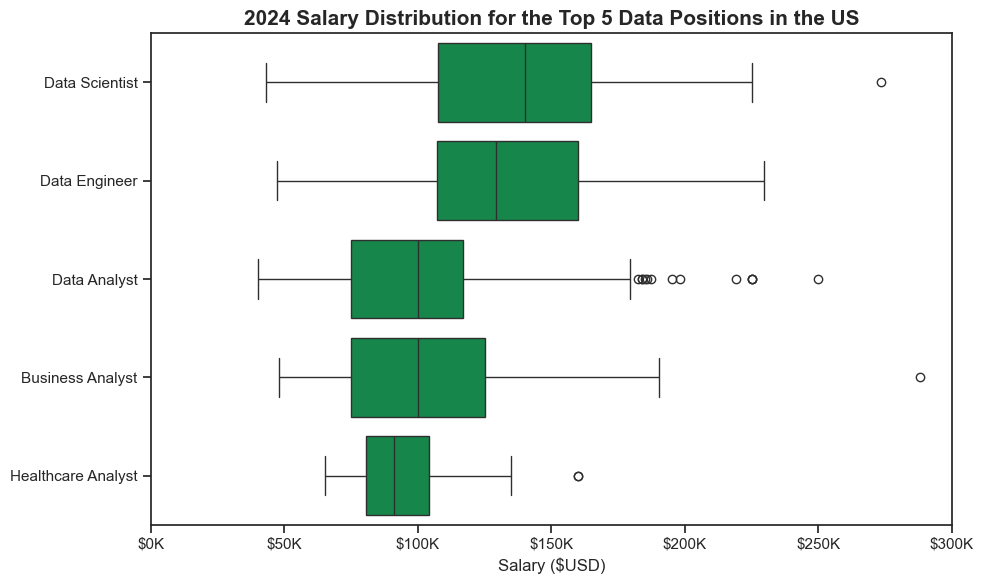

In [156]:
# Analyzing Salary Distribution of Popular Data Roles (2024)



# Create a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2024_top_positions, 
            x='salary_yearly', 
            y='clean_title',
            order=position_order_2024, color="#039949")

sns.set_theme(style='ticks')

plt.title('2024 Salary Distribution for the Top 5 Data Positions in the US', fontsize = 15, fontweight='bold')
plt.xlabel('Salary ($USD)')
plt.xlim(0, 300000)
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.tight_layout()
plt.show()

# Investigating 2024 U.S. Median Salary vs Skill for Analyst Job Listings

In [80]:
# Filtering Data Frame to hold only analyst job listings

df_2024_analyst =df_2024[
   df_2024['clean_title'].str.contains('analyst', case=False, na=False)
].copy()

df_2024_analyst.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,"[word, bigquery, redshift, excel, tableau, loo..."
2,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Progressive Insurance,United States,taleo,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,[sql]
3,2024-11-18 04:00:07.440530,2024-11-18,2024,11,DISH,"Littleton, CO",dish careers - dish network,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[pandas, redshift, tableau, airflow, r, aws, p..."
4,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Trimble,"Westminster, CO",jobs at trimble,Full-Time,False,Intern,Data Analyst,NaN,NaN,NaN,"[excel, sql, python]"
5,2024-11-18 04:00:07.440530,2024-11-18,2024,11,CommonSpirit Health,"Englewood, CO",commonspirit careers,Full-Time,False,,Data Analyst,NaN,NaN,NaN,[]


In [113]:
# Drop all NaN salary yearly values

df_2024_analyst = df_2024_analyst.dropna(subset=['salary_yearly'])
df_2024_analyst.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,word
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,bigquery
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,redshift
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,excel
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,tableau


In [114]:
# Expand the 'job_skills' list into separate rows for each skill

df_2024_analyst = df_2024_analyst.explode('job_skills')


# Preview salary and skill data after exploding for further analysis

df_2024_analyst[['salary_yearly', 'job_skills']].head(5)

,salary_yearly,job_skills
1,70000.0,word
1,70000.0,bigquery
1,70000.0,redshift
1,70000.0,excel
1,70000.0,tableau


In [115]:
# Extract Top Salary for analysts position across all job skills

df_2024_analyst.groupby('job_skills')['salary_yearly'].agg(['count', 'median']).sort_values(by='median', ascending=False)

,count,median
job_skills,,
mongodb,3,150000.0
graphql,2,143750.0
gdpr,7,135000.0
groovy,1,132132.0
jupyter,14,128375.0
...,...,...
cobol,1,60000.0
aurora,21,60000.0
swift,5,58032.0


In [116]:
# Extract Top Salary for analysts position across all job skills.
# Place extracted data into new Data Frame

df_2024_top_analyst_salary = (df_2024_analyst
                      .groupby('job_skills')['salary_yearly']
                      .agg(['count', 'median'])
                      .sort_values(by='median', ascending=False)
                    )
df_2024_top_analyst_salary.head(5)

,count,median
job_skills,,
mongodb,3,150000.0
graphql,2,143750.0
gdpr,7,135000.0
groovy,1,132132.0
jupyter,14,128375.0


In [117]:
# Extract top 10 salaries for analyst positions in 2024

df_2024_top_analyst_salary = df_2024_top_analyst_salary.head(10)
df_2024_top_analyst_salary

,count,median
job_skills,,
mongodb,3,150000.00
graphql,2,143750.00
gdpr,7,135000.00
groovy,1,132132.00
jupyter,14,128375.00
pyspark,10,125000.00
splunk,2,119710.00
css,4,117500.00
postgres,6,115626.75


In [118]:
# Explode skills for the analyst-filtered DataFrame
df_2024_analyst_exploded = df_2024_analyst.explode('job_skills')
df_2024_analyst_exploded.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,word
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,bigquery
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,redshift
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,excel
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,tableau


In [119]:
# Explode skills for the analyst-filtered DataFrame

df_2024_analyst_exploded = df_2024_analyst.explode('job_skills')
df_2024_analyst_exploded.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,word
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,bigquery
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,redshift
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,excel
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,tableau


In [120]:
# Place extracted data into a new DataFrame from the correct exploded DataFrame

df_2024_analyst_skill = (
    df_2024_analyst_exploded
    .groupby('job_skills')['salary_yearly']
    .agg(['count', 'median'])
    .sort_values(by='count', ascending=False)
)

df_2024_analyst_skill

,count,median
job_skills,,
sql,728,100000.0
python,477,100000.0
power_bi,440,100000.0
tableau,419,100000.0
excel,398,88898.5
...,...,...
mongo,1,72000.0
powerpoints,1,90000.0
jquery,1,103059.0


In [121]:
# Select top 10 analyst skills 

df_2024_analyst_skill = (df_2024_analyst_skill.head(10)
                         .sort_values(by='median', ascending=False)
                        )
df_2024_analyst_skill

,count,median
job_skills,,
sql,728,100000.0
python,477,100000.0
power_bi,440,100000.0
tableau,419,100000.0
r,302,100000.0
sas,128,100000.0
azure,107,100000.0
aws,116,100000.0
excel,398,88898.5


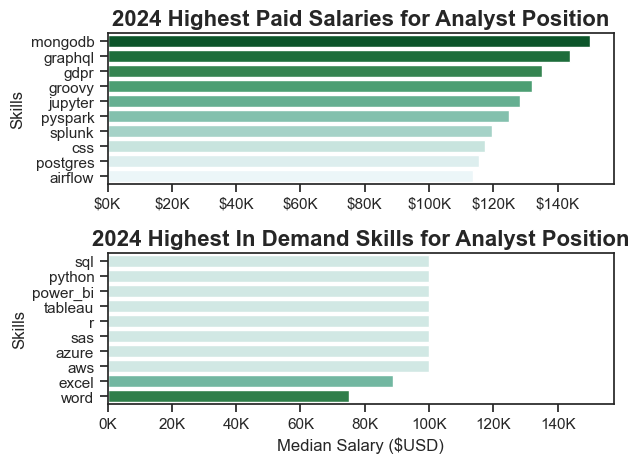

In [185]:
# The Most Lucrative Skills for Analyst Roles (2024)


# Setting figure for visuals
fig, ax = plt.subplots(2, 1)


# Setting visual theme style and colour palette
sns.set_theme(style='ticks')
palette = sns.color_palette('BuGn', len(df_2024_top_analyst_salary))



# Top 10 Highest Paid Salaries for Analyst Positions
sns.barplot(data=df_2024_top_analyst_salary, x='median', 
            y=df_2024_top_analyst_salary.index, ax = ax[0], 
            hue='median', palette=palette, legend=False
            )


ax[0].set_title('2024 Highest Paid Salaries for Analyst Position', fontsize=16, fontweight='bold')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))
ax[0].set_ylabel('Skills')


# Top 10 Most In Demand Skills for Analyst Positions
palette = sns.color_palette('BuGn_r', n_colors=3)

sns.barplot(data=df_2024_analyst_skill, x='median', 
            y=df_2024_analyst_skill.index, ax = ax[1],
            hue='median', palette=palette, legend=False
            )


ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('2024 Highest In Demand Skills for Analyst Position', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{int(x/1000)}K'))
ax[1].set_ylabel('Skills')

fig.tight_layout()
plt.show()

In [168]:
# Verifying job_skill empty lists

df_2024_analyst[df_2024_analyst['job_skills'].apply(lambda x: isinstance(x, list) and len(x) == 0)]

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills


In [169]:
# Place extracted data into new Data Frame

df_2024_skill_explode = df_2024_analyst.explode('job_skills')

# Verifying top 10 salaries and their corresponding job skills

df_2024_skill_explode[['salary_yearly', 'job_skills']].head(10)

,salary_yearly,job_skills
1,70000.0,word
1,70000.0,bigquery
1,70000.0,redshift
1,70000.0,excel
1,70000.0,tableau
1,70000.0,looker
1,70000.0,snowflake
1,70000.0,sql
44,142000.0,powerpoint
44,142000.0,excel


In [170]:
# Place extracted data into a new Data Frame

df_2024_analyst_skills = (df_2024_skill_explode
                          .groupby('job_skills')['salary_yearly']
                          .agg(['count', 'median'])
                          .sort_values(by='count',ascending=False )
                         )

df_2024_analyst_skills

,count,median
job_skills,,
sql,728,100000.0
python,477,100000.0
power_bi,440,100000.0
tableau,419,100000.0
excel,398,88898.5
...,...,...
mongo,1,72000.0
powerpoints,1,90000.0
jquery,1,103059.0


In [172]:
# Renaming the columns in new Data Frame for clarity

df_2024_analyst_skills = (df_2024_analyst_skills
                          .rename(columns=
                                  {'count' : 'skill_count', 
                                   'median': 'median_salary'})
                        )

df_2024_analyst_skills

,skill_count,median_salary
job_skills,,
sql,728,100000.0
python,477,100000.0
power_bi,440,100000.0
tableau,419,100000.0
excel,398,88898.5
...,...,...
mongo,1,72000.0
powerpoints,1,90000.0
jquery,1,103059.0


In [173]:
# Calculating the number of job listings for 2024, by taking the length of the data frame df_2024
# Place results in a variable named df_2024_job_count

df_2024_analyst_job_count = len(df_2024_analyst)
df_2024_analyst_job_count

5137

In [174]:
# Creating a new column for df_2024_analyst_skills named ['skill_percent']
# ['skill_percent'] will hold the percentage calculation below

df_2024_analyst_skills['skill_percent'] = (df_2024_analyst_skills['skill_count'] 
                                           / df_2024_analyst_job_count * 100
                                        )
df_2024_analyst_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,728,100000.0,14.171696
python,477,100000.0,9.285575
power_bi,440,100000.0,8.565310
tableau,419,100000.0,8.156512
excel,398,88898.5,7.747713
...,...,...,...
mongo,1,72000.0,0.019467
powerpoints,1,90000.0,0.019467
jquery,1,103059.0,0.019467


In [175]:
# Define a minimum percentage threshold to filter out less common skills
# This helps to reduce visual clutter in graphs by focusing only on more prevalent skills

min_2024_skill_threshold = 4  # Only include skills that appear in more than 2% of job skills

# Filter the analyst skills DataFrame based on the threshold and create a new DataFrame

df_2024_analyst_skills_filtered = (df_2024_analyst_skills
                                   [df_2024_analyst_skills['skill_percent'] 
                                    > min_2024_skill_threshold]
                                )

df_2024_analyst_skills_filtered

,skill_count,median_salary,skill_percent
job_skills,,,
sql,728,100000.0,14.171696
python,477,100000.0,9.285575
power_bi,440,100000.0,8.565310
tableau,419,100000.0,8.156512
excel,398,88898.5,7.747713
r,302,100000.0,5.878918


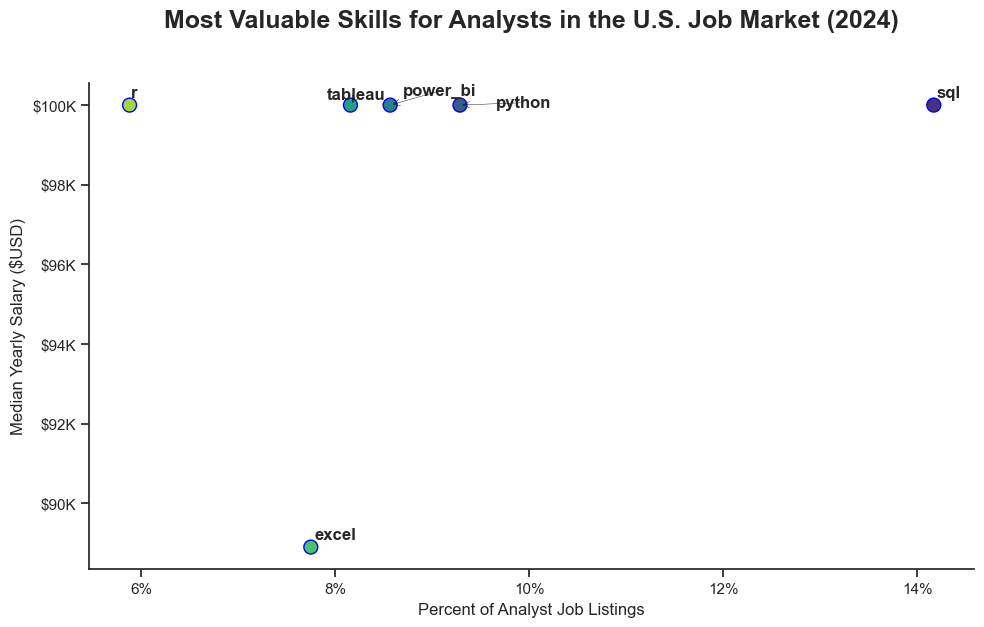

In [176]:
# Top Analyst Skills in the U.S. (2024)


# Import libraries
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text


# Set theme and colour palette
sns.set_theme(style='ticks')
palette = sns.color_palette('viridis', len(df_2024_analyst_skills_filtered))  

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Colour each point uniquely based on skill
scatter = ax.scatter(
    x=df_2024_analyst_skills_filtered['skill_percent'],
    y=df_2024_analyst_skills_filtered['median_salary'],
    c=palette,
    s=100,  # Increase scatter dot size for better visibility
    edgecolor='blue' 
)

# Add text labels
text = []
for i, txt in enumerate(df_2024_analyst_skills_filtered.index):
    text.append(ax.text(
        df_2024_analyst_skills_filtered['skill_percent'].iloc[i],
        df_2024_analyst_skills_filtered['median_salary'].iloc[i],
        txt,
        fontsize=12, 
        va ='bottom', 
        fontweight= 'bold'
    ))

adjust_text(text, arrowprops=dict(arrowstyle='->', color='black', lw=.3), fontweight='bold')

# Format x-axis and y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))

# Remove all spines 
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Set labels and title
ax.set_xlabel('Percent of Analyst Job Listings', fontsize=12)
ax.set_ylabel('Median Yearly Salary ($USD)', fontsize=12)
ax.set_title('Most Valuable Skills for Analysts in the U.S. Job Market (2024)', fontsize=18, fontweight='bold', pad=40)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()